### Lab: Clustering with Sklearn

In [4]:
%matplotlib inline
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics, datasets

plt.rcParams['figure.figsize'] = (8, 6)

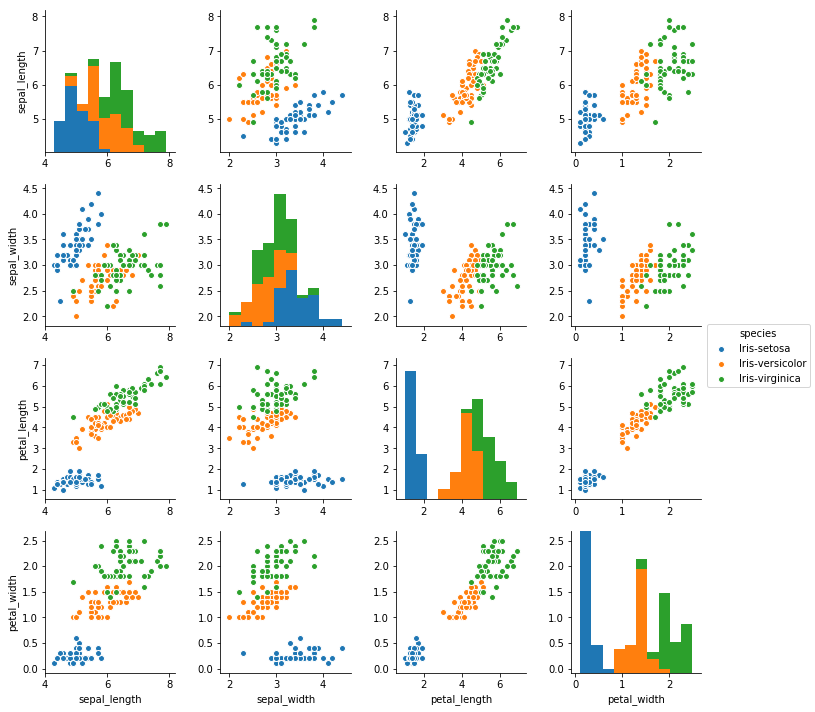

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
iris = pd.read_csv("data/iris/iris.data")
sns.pairplot(iris, hue="species")
plt.show()
iris.tail()

### 1. K-Means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=3
* sepal_width and petal_width, for k=3

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

In [11]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

Counter({2: 53, 1: 49, 0: 48})


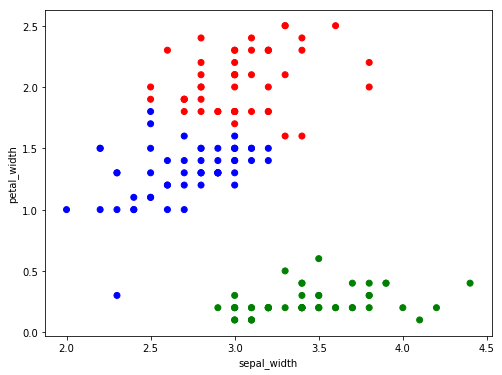

In [13]:
from sklearn import metrics

# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["sepal_width"], iris["petal_width"], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

Counter({0: 58, 1: 51, 2: 41})


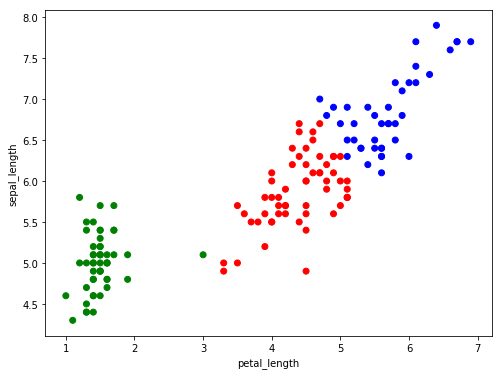

In [15]:
from sklearn import metrics

# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

### 2. DBSCAN

For the Iris dataset, fit and plot DBSCAN models to:
* sepal_length and petal_length
* sepal_width and petal_width

Counter({1: 91, 0: 50, -1: 9})


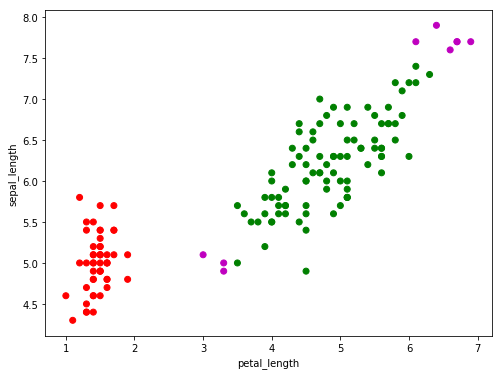

In [16]:
## Exercise Answers here

# Fit a DBSCAN
estimator = DBSCAN(eps=0.5, min_samples=10)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

Counter({1: 82, 0: 44, -1: 24})


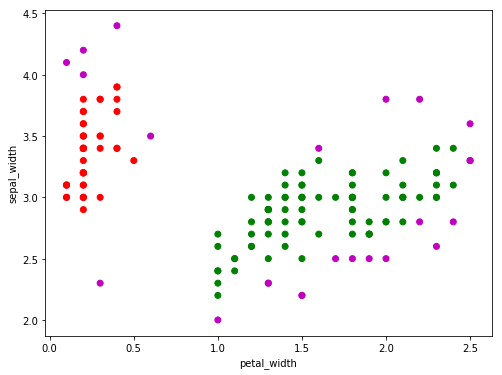

In [17]:
## Exercise Answers here

# Fit a DBSCAN
estimator = DBSCAN(eps=0.2, min_samples=5)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_width"], iris["sepal_width"], c=colors)
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

### Bonus: Try clustering different beers

In [18]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [19]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(beer[["calories", "sodium", "alcohol", "cost"]])

In [20]:
est = KMeans(3)
est.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
beer["label"] = est.labels_

In [22]:
colors = set_colors(beer["label"])

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


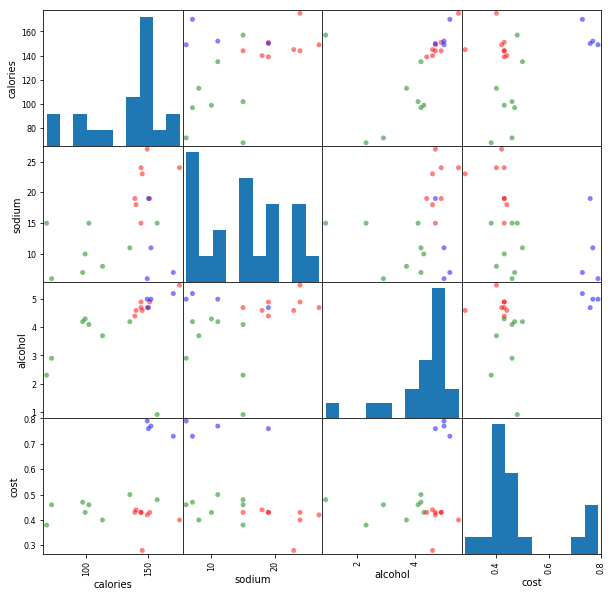

In [23]:
pd.scatter_matrix(beer[["calories", "sodium", "alcohol", "cost"]], c=colors, figsize=(10,10), s=100)
plt.show()